## Py-ART 2.0: Field manipulation and Saving the Radar Object to a file.

In this section we will go over the basics of how to change the data inside a radar file and save a new radar file. We will do this by creating a new field that stores a reflectivity mask.

In [1]:
import pyart
import numpy as np
import os
from matplotlib import pyplot as plt

%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/Users/scollis/anaconda3/envs/saws/lib/python3.6/site-packages/pyart/graph/cm.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/Users/scollis/anaconda3/envs/saws/lib/python3.6/site-packages/pyart/graph/cm_colorblind.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:


As before, we will load our trusty radar file!

In [2]:
radar = pyart.io.read(os.path.expanduser('~/data/arm/csapr_test_case.nc'))

Let's store the radar field into a variable.

In [3]:
ref_field = radar.fields['reflectivity']['data']

To create an array that is zero when the condition is false and one when it is true, we can make use of the np.ma.where command.

In [4]:
ref_gt_0 = np.ma.where(ref_field > 0, 1, 0)
print(ref_gt_0)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


To create a new field, we need to create a dictionary with keys containing the data, the long name, the units, the fill value, and the standard name.

In [5]:
mask_dict = {'data': ref_gt_0, 'units': '0 = Z < 0, 1 = Z >= 0', 'long_name': 'reflectivity_mask',
             '_FillValue': ref_gt_0.fill_value, 'standard_name': 'reflectivity_mask'}

Adding this field into the radar object is as simple as doing radar.add_field()!

In [6]:
radar.add_field('reflectivity_mask', mask_dict, replace_existing=True)

We can now plot the field using RadarMapDisplayCartopy!

/Users/scollis/anaconda3/envs/saws/lib/python3.6/site-packages/pyart/graph/radarmapdisplay.py:268: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes.
  UserWarning)


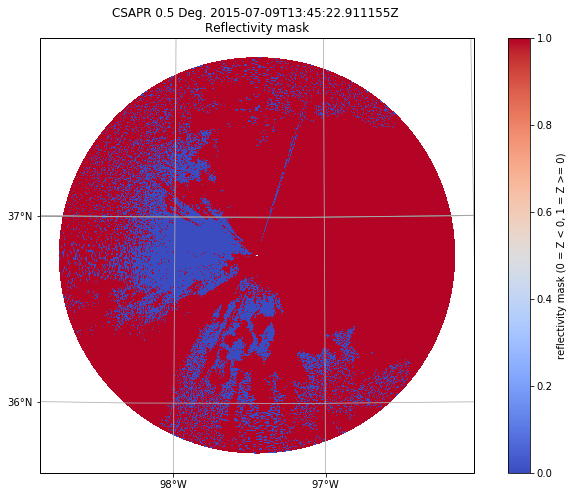

In [7]:
plt.figure(figsize=[12, 8])
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity_mask', cmap='coolwarm', vmin=0, vmax=1)

As you can see, we have now located all of the regions where the reflectivity is greater than 0 dBZ.

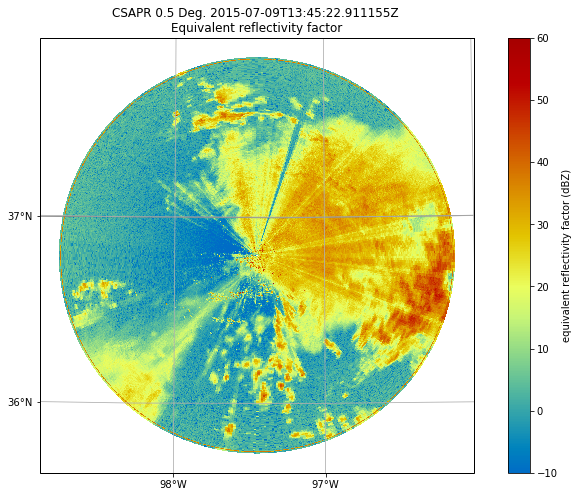

In [9]:
plt.figure(figsize=[12, 8])
display.plot_ppi_map('reflectivity', vmin=-10, vmax=60)

Writing this radar object to a new file is as simple as uing pyart.io.write_cfradial()!

In [10]:
pyart.io.write_cfradial(os.path.expanduser('~/data/arm/new_radar.nc'), radar)

Now, if you look in the data folder within the pyart_short_course, you should see new_radar.nc

## Exercise

Create a field that is zero when the normalized coherent power is < 0.5 and is one when it is > 0.5

In [ ]:
%load section_2_answer.py
